In [1]:
import os
import numpy as np
import pandas as pd
from datetime import datetime

from IPython.display import Image

# plotly
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

# matplotlib
import matplotlib.pyplot as plt

#seaborn
import seaborn as sns

#linear regression
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.tools.eval_measures import rmse
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [2]:
#read required files from datasets used in stage 2
f1 = pd.read_csv("../../../../data/stage_2/covid_confirmed_usafacts.csv")
f2 = pd.read_csv("../../../../data/stage_2/covid_deaths_usafacts.csv")
f3 = pd.read_csv("../../../../data/stage_2/covid_county_population_usafacts.csv")

f1.columns = f1.columns.str.replace(' ', '_')
f1.columns = f1.columns.str.lower()

f2.columns = f2.columns.str.replace(' ', '_')
f2.columns = f2.columns.str.lower()

f3.columns = f3.columns.str.replace(' ', '_')
f3.columns = f3.columns.str.lower()

f1_1 = f1[f1['countyfips'] != 0]
f2_1 = f2[f2['countyfips'] != 0]
f3_1 = f3[f3['countyfips'] != 0]

## Task 1: Utilize linear and nonlinear regression models to compare trends for a single state and its counties (top 5 counties with highest number of cases), starting from the first day of infections.

I have computed linear and polynomial regression models and generated trend and forecast plots for the state of North Carolina (NC) and its top five counties with highest number of cases.

In [3]:
#filter NC cases and drop columns not needed
cases_NC = f1_1.query("state == 'NC'")
cases_NC_filt = cases_NC.drop(columns = ['countyfips','statefips','state','2020-01-22','2020-01-23',
                                         '2020-01-24','2022-02-06','2022-02-07'])
#set county_name as index
cases_NC_filt.set_index('county_name', inplace=True)

#new daily cases by county
new_cases_NC = cases_NC_filt.diff(axis=1)

#delete data for 2020-01-25
new_cases_daily_NC = new_cases_NC.drop(columns = ['2020-01-25'])

In [4]:
#compute total new cases in the state of NC over the period
NC_total_cases = new_cases_daily_NC.sum(axis=0)
NC_total_cases = NC_total_cases.reset_index(drop=True)

In [5]:
#transpose data to convert to long format
new_cases_NC_m = new_cases_daily_NC.T.reset_index()
new_cases_NC_m = new_cases_NC_m.rename_axis(None, axis=1)
new_cases_NC_m.rename(columns = {'index':'date'}, inplace = True)
new_cases_NC_m['date'] = pd.to_datetime(new_cases_NC_m['date'])
new_cases_NC_m

,date,Alamance County,Alexander County,Alleghany County,Anson County,Ashe County,Avery County,Beaufort County,Bertie County,Bladen County,...,Vance County,Wake County,Warren County,Washington County,Watauga County,Wayne County,Wilkes County,Wilson County,Yadkin County,Yancey County
0,2020-01-26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-01-27,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2020-01-28,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020-01-29,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2020-01-30,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,2022-02-01,120,58,12,36,34,8,64,6,23,...,19,834,15,16,97,108,119,70,48,3
738,2022-02-02,160,-14,5,27,17,8,49,26,35,...,96,1612,29,12,116,132,62,109,32,4
739,2022-02-03,251,33,24,38,51,41,72,32,55,...,67,1429,30,12,121,108,97,114,48,18
740,2022-02-04,126,-12,28,22,66,11,29,11,55,...,49,1546,25,7,108,111,141,129,79,14


In [6]:
#filter NC deaths and drop columns not needed
deaths_NC = f2_1.query("state == 'NC'")
deaths_NC_filt = deaths_NC.drop(columns = ['countyfips','state','statefips','2020-01-22','2020-01-23',
                                           '2020-01-24','2022-02-06','2022-02-07'])

#set county_name as index
deaths_NC_filt.set_index('county_name', inplace=True)

#new daily cases by county
new_deaths_NC = deaths_NC_filt.diff(axis=1)

#delete data for 2020-01-25
new_deaths_daily_NC = new_deaths_NC.drop(columns = ['2020-01-25'])

In [7]:
#compute total deaths in the state of NC over the period
NC_total_deaths = new_deaths_daily_NC.sum(axis=0)
NC_total_deaths = NC_total_deaths.reset_index(drop=True)

In [8]:
#transpose data to convert to long format
new_deaths_NC_m = new_deaths_daily_NC.T.reset_index()
new_deaths_NC_m = new_deaths_NC_m.rename_axis(None, axis=1)
new_deaths_NC_m.rename(columns = {'index':'date'}, inplace = True)
new_deaths_NC_m['date'] = pd.to_datetime(new_deaths_NC_m['date'])
new_deaths_NC_m

,date,Alamance County,Alexander County,Alleghany County,Anson County,Ashe County,Avery County,Beaufort County,Bertie County,Bladen County,...,Vance County,Wake County,Warren County,Washington County,Watauga County,Wayne County,Wilkes County,Wilson County,Yadkin County,Yancey County
0,2020-01-26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-01-27,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2020-01-28,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020-01-29,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2020-01-30,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,2022-02-01,1,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,16,0,0
738,2022-02-02,0,2,0,1,0,0,0,2,2,...,0,0,1,0,0,0,2,0,0,0
739,2022-02-03,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,5,1,0,0,1
740,2022-02-04,0,0,0,0,0,0,0,0,0,...,0,2,0,0,1,0,0,0,1,2


In [9]:
#compute dates since beginning
days=(new_cases_NC_m['date'] - new_cases_NC_m.date[0]).dt.days
x = days.squeeze()

Below is the function that generates the estimated coefficients and RMSE.

It also generates plots for linear regression model and nonlinear regression models (of order=2 and order=3). The fitted plot shows the trend line and 95% confidence interval for each of the three models. The predicted plot shows the predicted counts for the next seven days after February 5, 2022.

In [10]:
X = pd.DataFrame({'x': x})
n = len(x)
max_x = max(x)
x_new = pd.DataFrame({'x':np.arange(max_x+1, max_x+8)})

def model(x,y,df):    
    
    ## linear model (of degree 1)
    print('Linear model (degree=1)\n')
    m_1 = smf.ols(formula='y ~ x', data=df).fit()
    print('The coefficient estimates are:\n', m_1.params)
      
    rmse_1 = rmse(y, m_1.predict(X))
    print('RMSE = ',rmse_1)
   
    #predicting next 7 day counts
    pred_1 = m_1.predict(x_new)
        
    c1 = m_1.predict(X).copy(deep = True)
    c2 = pred_1.copy(deep = True)
    p1 = pd.concat([c1, c2], ignore_index=True, sort=False) #predicted and forecasted counts for linear model

    ## nonlinear model (of degree 2)
    print('Nonlinear model (degree=2)\n')
    m_2 = smf.ols(formula='y ~ x + I(x ** 2.0)', data=df).fit()
    print('The coefficient estimates are:\n', m_2.params)
      
    rmse_2 = rmse(y, m_2.predict(X))
    print('RMSE = ',rmse_2)
    
    #predicting next 7 day counts
    pred_2 = m_2.predict(x_new)
        
    c1 = m_2.predict(X).copy(deep = True)
    c2 = pred_2.copy(deep = True)
    p2 = pd.concat([c1, c2], ignore_index=True, sort=False) #predicted and forecasted counts for nonlinear model of degree 2
     
    ## nonlinear model (of degree 3)
    print('Nonlinear model (degree=3)\n')
    m_3 = smf.ols(formula='y ~ x + I(x ** 2.0) + I(x ** 3.0)', data=df).fit()
    print('The coefficient estimates are:\n', m_3.params)
     
    rmse_3 = rmse(y, m_3.predict(X))
    print('RMSE = ',rmse_3)
    
    #predicting next 7 day counts
    pred_3 = m_3.predict(x_new)
        
    c1 = m_3.predict(X).copy(deep = True)
    c2 = pred_3.copy(deep = True)
    p3 = pd.concat([c1, c2], ignore_index=True, sort=False) #predicted and forecasted counts for nonlinear model of degree 3
    
    ## plots of all the three models and the predicted counts
    #splitting plot into two parts: Fitted plot and Predicted plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8*1.618, 8))
    
    #scatter plot of points
    ax1.scatter(x,y, color='0.8', label='Values')

    #fitted values for linear model
    sns.regplot(x=p1[:n-1].index, y=p1[:n-1].values, data=p1, order=1, color='black', scatter=False, 
                ax=ax1, label='Linear Model (degree=1)')
    ax2.plot(p1[n:].index, p1[n:].values, 'kx', label='Linear Model (degree=1)')
    
    #fitted values for nonlinear model (degree=2)
    sns.regplot(x=p2[:n-1].index, y=p2[:n-1].values, data=p2, order=2, color='green', scatter=False, 
                ax=ax1, label='NonLinear Model (degree=2)')
    ax2.plot(p2[n:].index, p2[n:].values, 'gx', label='NonLinear Model (degree=2)')
    
    #fitted values for nonlinear model (degree=3)
    sns.regplot(x=p3[:n-1].index, y=p3[:n-1].values, data=p3, order=3, color='red', scatter=False, 
                ax=ax1, label='NonLinear Model (degree=3)')
    ax2.plot(p3[n:].index, p3[n:].values, 'rx', label='NonLinear Model (degree=3)')
    
    ax1.legend()
    ax2.legend()
    
    ax1.title.set_text('Fitted values')
    ax2.title.set_text('Predicted values')
    
    plt.show()

## Modelling cases and deaths for the state of NC

Linear model (degree=1)

The coefficient estimates are:
 Intercept   -921.852035
x             11.468512
dtype: float64
RMSE =  8206.060231967505
Nonlinear model (degree=2)

The coefficient estimates are:
 Intercept      1876.361626
x               -11.219706
I(x ** 2.0)       0.030618
dtype: float64
RMSE =  8109.297759982663
Nonlinear model (degree=3)

The coefficient estimates are:
 Intercept     -3595.482528
x                77.693062
I(x ** 2.0)      -0.269560
I(x ** 3.0)       0.000270
dtype: float64
RMSE =  7836.687819588168


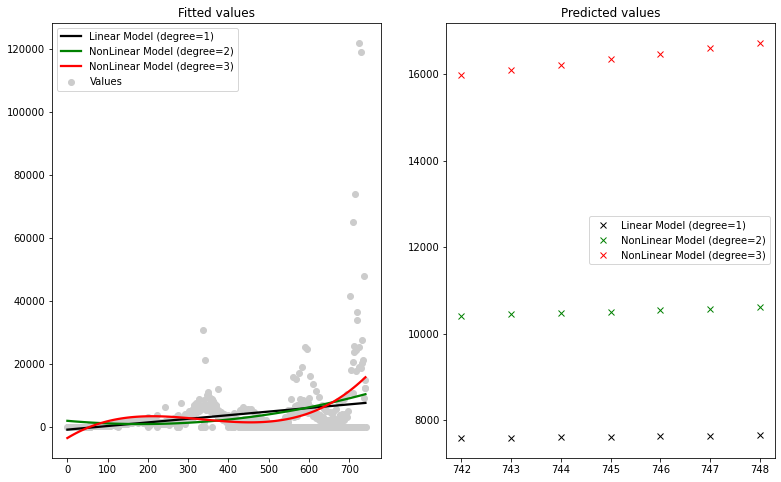

In [11]:
#make a dataframe with total counts
NC = pd.DataFrame({'x': days, 'Cases': NC_total_cases, 'Deaths' : NC_total_deaths})

#NC Cases
x = NC.x
y = NC.Cases
model(x,y,NC)

Linear model (degree=1)

The coefficient estimates are:
 Intercept    14.092830
x             0.038704
dtype: float64
RMSE =  37.84366074559288
Nonlinear model (degree=2)

The coefficient estimates are:
 Intercept     -0.255863
x              0.155045
I(x ** 2.0)   -0.000157
dtype: float64
RMSE =  37.29116974939403
Nonlinear model (degree=3)

The coefficient estimates are:
 Intercept     -1.454579e+01
x              3.872436e-01
I(x ** 2.0)   -9.409310e-04
I(x ** 3.0)    7.052865e-07
dtype: float64
RMSE =  36.89151687631939


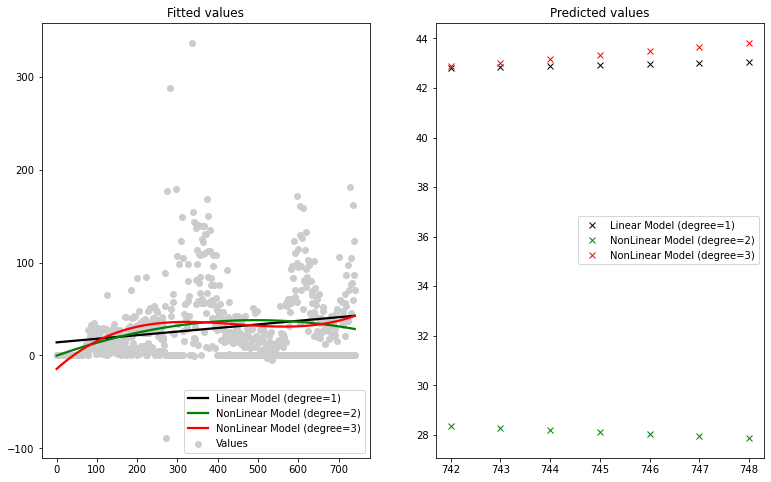

In [12]:
#NC Deaths
x = NC.x
y = NC.Deaths
model(x,y,NC)

## Modelling cases and deaths for the top 5 counties in NC with highest cases

In [13]:
#top 5 counties with highest number of cases
new_cases_daily_NC.mean(axis=1).sort_values(ascending=False).head(5)

county_name
Wake County            366.192722
Mecklenburg County     357.247978
Guilford County        147.722372
Forsyth County         118.229111
Cumberland County      104.687332
dtype: float64

The top 5 counties in NC with the highest number of cases are *Wake County*, *Mecklenburg County*, *Guilford County*, *Forsyth County*, *Cumberland County*.

In [14]:
#subset data for chosen counties
top5_cases_NC = new_cases_NC_m[['Wake County ', 'Mecklenburg County ', 'Guilford County ', 
                                             'Forsyth County ', 'Cumberland County ']]

top5_deaths_NC = new_deaths_NC_m[['Wake County ', 'Mecklenburg County ', 'Guilford County ', 
                                             'Forsyth County ', 'Cumberland County ']]

### Wake County

Linear model (degree=1)

The coefficient estimates are:
 Intercept   -216.816944
x              1.573575
dtype: float64
RMSE =  1208.5905718867114
Nonlinear model (degree=2)

The coefficient estimates are:
 Intercept      320.199432
x               -2.780611
I(x ** 2.0)      0.005876
dtype: float64
RMSE =  1184.291166832829
Nonlinear model (degree=3)

The coefficient estimates are:
 Intercept     -479.857389
x               10.219625
I(x ** 2.0)     -0.038014
I(x ** 3.0)      0.000039
dtype: float64
RMSE =  1144.3833014325096


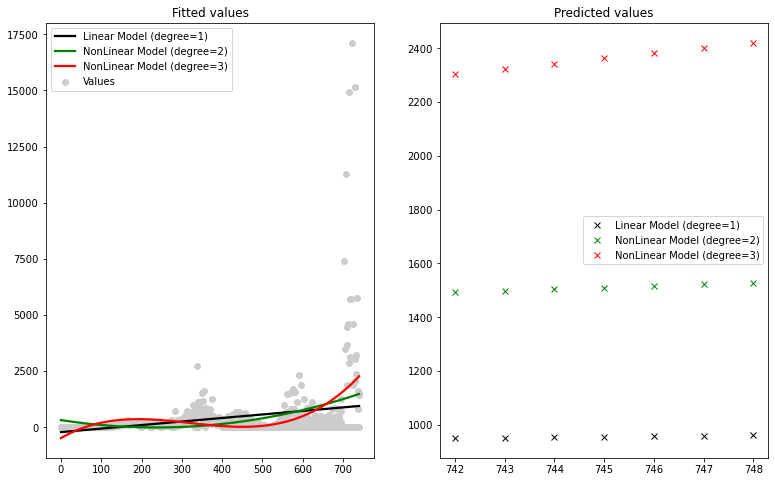

In [15]:
#make a dataframe with total counts
w = pd.DataFrame({'x': days, 'Cases': top5_cases_NC['Wake County '], 'Deaths' : top5_deaths_NC['Wake County ']})

#Wake County Cases
x = w.x
y = w.Cases
model(x,y,w)

Linear model (degree=1)

The coefficient estimates are:
 Intercept    1.087781
x            0.000589
dtype: float64
RMSE =  3.764952537802188
Nonlinear model (degree=2)

The coefficient estimates are:
 Intercept     -0.129031
x              0.010455
I(x ** 2.0)   -0.000013
dtype: float64
RMSE =  3.725095609732157
Nonlinear model (degree=3)

The coefficient estimates are:
 Intercept     -7.500095e-01
x              2.054521e-02
I(x ** 2.0)   -4.738054e-05
I(x ** 3.0)    3.064872e-08
dtype: float64
RMSE =  3.7175733157808373


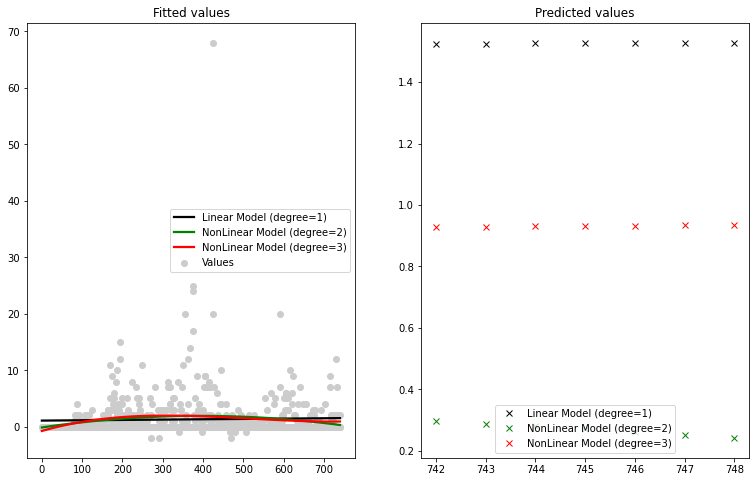

In [16]:
#Wake County Deaths
x = w.x
y = w.Deaths
model(x,y,w)

### Mecklenburg County 

Linear model (degree=1)

The coefficient estimates are:
 Intercept   -71.498387
x             1.157210
dtype: float64
RMSE =  929.86105700107
Nonlinear model (degree=2)

The coefficient estimates are:
 Intercept      233.399235
x               -1.314933
I(x ** 2.0)      0.003336
dtype: float64
RMSE =  919.727198542049
Nonlinear model (degree=3)

The coefficient estimates are:
 Intercept     -384.355619
x                8.723053
I(x ** 2.0)     -0.030553
I(x ** 3.0)      0.000030
dtype: float64
RMSE =  889.0961550465381


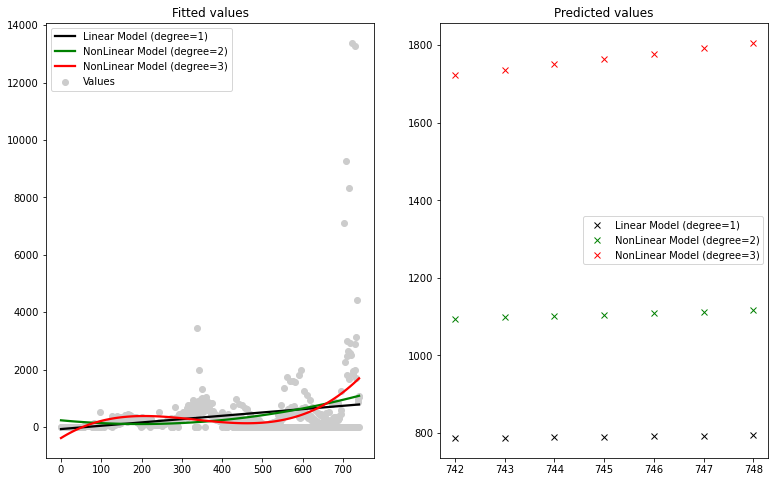

In [17]:
#make a dataframe with total counts
m = pd.DataFrame({'x': days, 'Cases': top5_cases_NC['Mecklenburg County '], 'Deaths' : top5_deaths_NC['Mecklenburg County ']})

#Mecklenburg County Cases
x = m.x
y = m.Cases
model(x,y,m)

Linear model (degree=1)

The coefficient estimates are:
 Intercept    1.331827
x            0.001753
dtype: float64
RMSE =  3.3476022854034166
Nonlinear model (degree=2)

The coefficient estimates are:
 Intercept      0.622791
x              0.007501
I(x ** 2.0)   -0.000008
dtype: float64
RMSE =  3.3324282961576923
Nonlinear model (degree=3)

The coefficient estimates are:
 Intercept     -1.113312e+00
x              3.571163e-02
I(x ** 2.0)   -1.029986e-04
I(x ** 3.0)    8.568625e-08
dtype: float64
RMSE =  3.2661106942207896


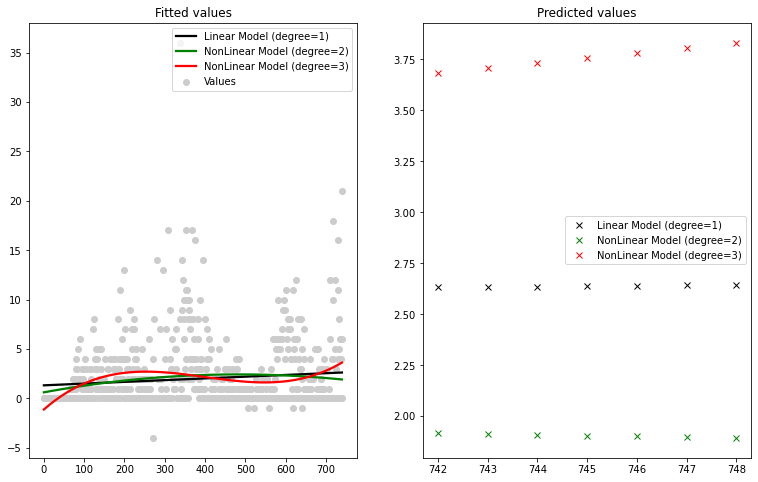

In [18]:
#Mecklenburg County Deaths
x = m.x
y = m.Deaths
model(x,y,m)

### Guilford County

Linear model (degree=1)

The coefficient estimates are:
 Intercept   -30.723468
x             0.481635
dtype: float64
RMSE =  372.85631773214493
Nonlinear model (degree=2)

The coefficient estimates are:
 Intercept      68.145751
x              -0.320007
I(x ** 2.0)     0.001082
dtype: float64
RMSE =  370.2039117093984
Nonlinear model (degree=3)

The coefficient estimates are:
 Intercept     -158.832536
x                3.368195
I(x ** 2.0)     -0.011370
I(x ** 3.0)      0.000011
dtype: float64
RMSE =  359.95980733748604


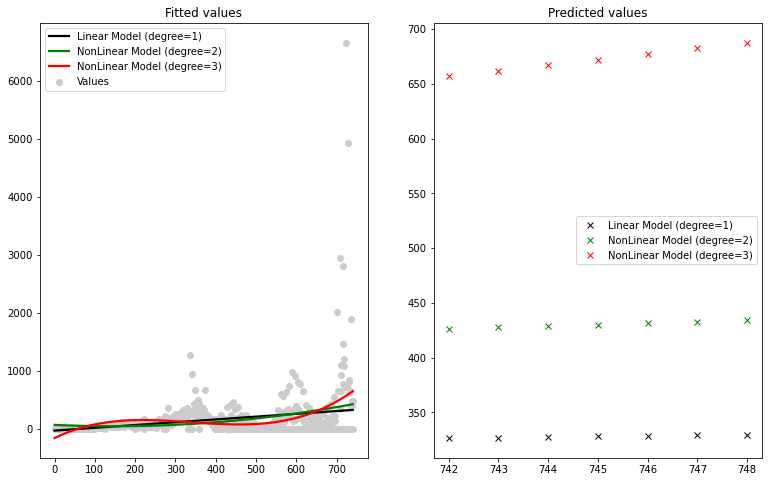

In [19]:
#make a dataframe with total counts
g = pd.DataFrame({'x': days, 'Cases': top5_cases_NC['Guilford County '], 'Deaths' : top5_deaths_NC['Guilford County ']})

#Guilford County Cases
x = g.x
y = g.Cases
model(x,y,g)

Linear model (degree=1)

The coefficient estimates are:
 Intercept    0.892201
x            0.001273
dtype: float64
RMSE =  2.6048307511898403
Nonlinear model (degree=2)

The coefficient estimates are:
 Intercept     -0.019151
x              0.008662
I(x ** 2.0)   -0.000010
dtype: float64
RMSE =  2.5724855350196565
Nonlinear model (degree=3)

The coefficient estimates are:
 Intercept     -4.587694e-01
x              1.580585e-02
I(x ** 2.0)   -3.408898e-05
I(x ** 3.0)    2.169758e-08
dtype: float64
RMSE =  2.567026007939236


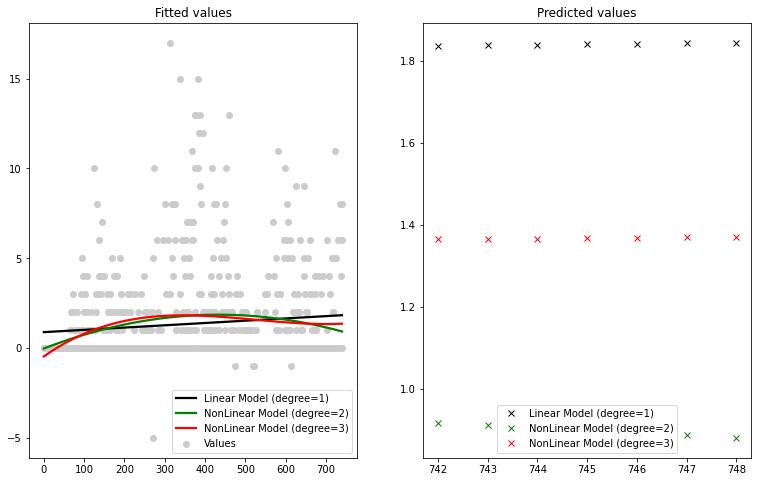

In [20]:
#Guilford County Deaths
x = g.x
y = g.Deaths
model(x,y,g)

### Forsyth County

Linear model (degree=1)

The coefficient estimates are:
 Intercept   -30.351366
x             0.401027
dtype: float64
RMSE =  296.4432283618777
Nonlinear model (degree=2)

The coefficient estimates are:
 Intercept      69.707960
x              -0.410265
I(x ** 2.0)     0.001095
dtype: float64
RMSE =  293.01869654530566
Nonlinear model (degree=3)

The coefficient estimates are:
 Intercept     -131.876593
x                2.865311
I(x ** 2.0)     -0.009964
I(x ** 3.0)      0.000010
dtype: float64
RMSE =  282.7722018351345


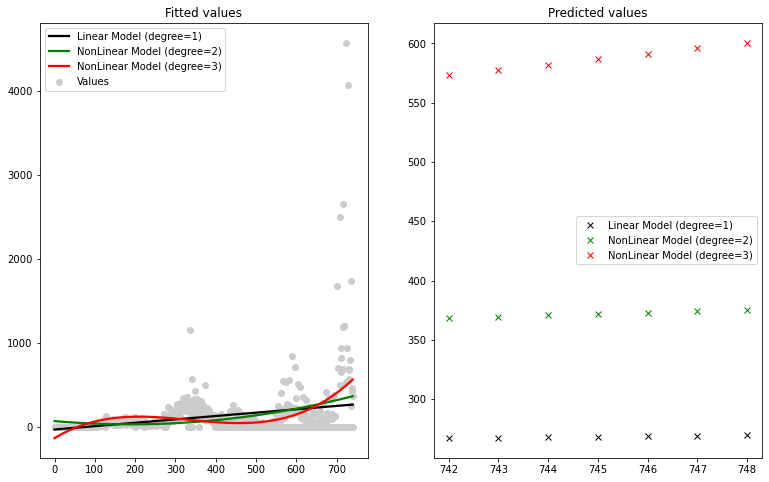

In [21]:
#make a dataframe with total counts
f = pd.DataFrame({'x': days, 'Cases': top5_cases_NC['Forsyth County '], 'Deaths' : top5_deaths_NC['Forsyth County ']})

#Forsyth County Cases
x = f.x
y = f.Cases
model(x,y,f)

Linear model (degree=1)

The coefficient estimates are:
 Intercept   -30.351366
x             0.401027
dtype: float64
RMSE =  296.4432283618777
Nonlinear model (degree=2)

The coefficient estimates are:
 Intercept      69.707960
x              -0.410265
I(x ** 2.0)     0.001095
dtype: float64
RMSE =  293.01869654530566
Nonlinear model (degree=3)

The coefficient estimates are:
 Intercept     -131.876593
x                2.865311
I(x ** 2.0)     -0.009964
I(x ** 3.0)      0.000010
dtype: float64
RMSE =  282.7722018351345


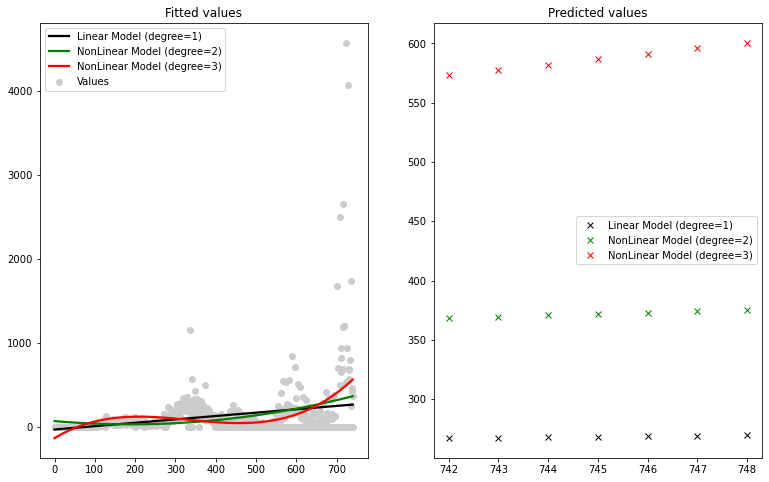

In [22]:
#Forsyth County Deaths
x = f.x
y = f.Cases
model(x,y,f)

### Cumberland County

Linear model (degree=1)

The coefficient estimates are:
 Intercept   -39.935125
x             0.390344
dtype: float64
RMSE =  242.29870691534293
Nonlinear model (degree=2)

The coefficient estimates are:
 Intercept      55.438634
x              -0.382957
I(x ** 2.0)     0.001044
dtype: float64
RMSE =  238.48409209738284
Nonlinear model (degree=3)

The coefficient estimates are:
 Intercept     -111.929652
x                2.336634
I(x ** 2.0)     -0.008138
I(x ** 3.0)      0.000008
dtype: float64
RMSE =  229.799223244274


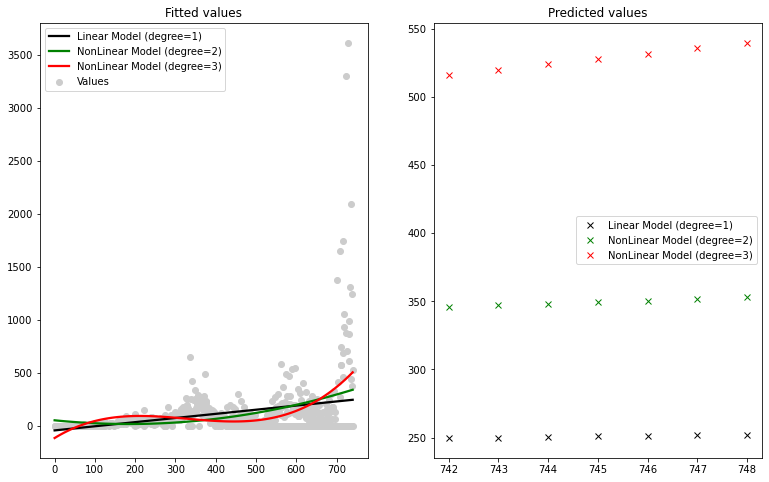

In [23]:
#make a dataframe with total counts
c = pd.DataFrame({'x': days, 'Cases': top5_cases_NC['Cumberland County '], 'Deaths' : top5_deaths_NC['Cumberland County ']})

#Cumberland County Cases
x = c.x
y = c.Cases
model(x,y,c)

Linear model (degree=1)

The coefficient estimates are:
 Intercept    0.355704
x            0.000924
dtype: float64
RMSE =  1.6707814084418704
Nonlinear model (degree=2)

The coefficient estimates are:
 Intercept     -0.183202
x              0.005294
I(x ** 2.0)   -0.000006
dtype: float64
RMSE =  1.6531651360197863
Nonlinear model (degree=3)

The coefficient estimates are:
 Intercept     -7.181554e-02
x              3.483760e-03
I(x ** 2.0)    2.137188e-07
I(x ** 3.0)   -5.497519e-09
dtype: float64
RMSE =  1.6526202405978456


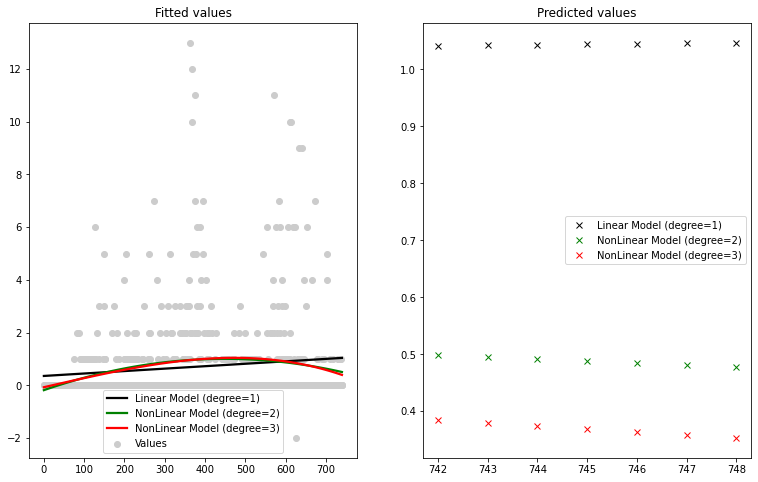

In [24]:
#Cumberland County Deaths
x = c.x
y = c.Deaths
model(x,y,c)

## Task 2: Utilize hospital data to calculate point of no return for a state. 

Now calculate point of no return for the state of NC. To do this, first compute the weekly average number of hospital beds available in each state. 

Assuming that roughly 10% of all COVID-19 cases need hospitalization, we can say that if there are not sufficient hospital beds in the state for 10% of the predicted cases in the week ahead, If the number of cases predicted from February 6, 2022 to February 12, 2022 exceed the total beds available in the state, it is a point of no return.

In [25]:
#read hospital beds data file and compute state totals
beds = pd.read_csv("../../../../data/stage_4/total_hospital_beds.csv")
beds_total = beds.groupby('state').mean().round(0).astype(int)

In [26]:
beds_NC = beds_total.query("state == 'NC'")
beds_NC

,total_beds_7_day_avg
state,
NC,235


In [27]:
#number of COVID-19 cases needing hospitalization
(smf.ols(formula='Cases ~ x', data=NC).fit().predict(x_new) * 0.1).mean()

762.2189696410396

During the week from 02/06/2022 to 02/12/2022, the mean predicted cases in NC that might have needed hospitalization (about 10% of total cases) was 761 while the total number of hospital beds in NC is 235. This indicates that there was a shortage of beds for COVID-19 patients in the state who needed hospitalization in this period.

In order to look for states which were possibly at the point of no return, we could look at the difference between the average predicted COVID-19 cases needing hospitalization in the next week (estimated to be about 10% of total cases) and the average number of total hospital beds in the state. If the difference is positive, meaning that possible hospitalizations in the state in the next week are higher than the bed availability at hospitals there, it indicates a **shortage of beds** in that state.

First compute weekly forecasts of hospitalizations for each state.

In [28]:
#drop extra columns
cases_states = f1_1.drop(columns = ["countyfips","statefips","2020-01-22","2020-01-23","2020-01-24","2022-02-06","2022-02-07"])

#total cases by state
cases_states_total = cases_states.groupby('state').sum()

#new daily cases by state
new_cases_daily = cases_states_total.diff(axis=1)

#delete data for 2020-01-25
new_cases_daily = new_cases_daily.drop(columns = ['2020-01-25'])

#transpose data to convert to long format
new_cases_daily_m = new_cases_daily.T.reset_index()
new_cases_daily_m = new_cases_daily_m.rename_axis(None, axis=1)
new_cases_daily_m.rename(columns = {'index':'date'}, inplace = True)

new_cases_daily_m = new_cases_daily_m.drop(columns=['date'])
new_cases_daily_m

,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,0,0,0,1,7,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,10,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,7,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,2116,76151,4235,7489,41748,6007,1237,1132,335,0,...,0,0,34674,2569,6055,311,0,3852,2151,800
738,1548,0,4018,8407,13794,3235,1777,144,462,0,...,6058,0,25320,2942,6678,457,15629,5582,2988,1077
739,1119,0,4037,4794,1785,1079,2443,191,790,0,...,0,92519,26234,2562,7139,254,0,5405,3291,744
740,1925,11196,1334,12077,57584,4731,1267,259,595,131698,...,0,0,21413,2581,6500,0,11572,4067,2911,716


In [29]:
#perform linear regression and compute average predicted requirement of hospital beds in the next week for each state
req_beds=[]
x_new = np.arange(max_x+1, max_x+8)

for column in new_cases_daily_m:
    x = new_cases_daily_m.index.values
    y = new_cases_daily_m[column]
    
    x1 = x.reshape(-1,1)
    y1 = y.values.reshape(-1,1)
    reg = LinearRegression()
    reg.fit(x1,y1)
    
    #y_pred = m.predict(x_new)
    y_pred = reg.predict(x_new.reshape(-1,1))
    
    mn = (y_pred * 0.1).mean()
    req_beds.append(mn) #this is the average requirement over the next week

In [30]:
df2 = pd.DataFrame({'state':new_cases_daily_m.columns.values.tolist(), 'required_beds': req_beds})
df2.head()

,state,required_beds
0,AK,71.784085
1,AL,345.962725
2,AR,213.257023
3,AZ,532.503658
4,CA,2306.010186


#### Compute difference between required beds and total beds in each state. States with a positive difference have shortage (shortage=1) and states with negative difference do not have shortage (shortage=0).

In [31]:
#compute difference between required beds and total beds in the state
#states with a positive difference are likely to have shortages

no_return = pd.merge(df2,beds_total,left_on='state',right_index=True)
no_return['difference'] = no_return['required_beds'] - no_return['total_beds_7_day_avg']
no_return['shortage'] = no_return.difference.gt(0).astype(int)
no_return.set_index('state', drop=True, inplace=True)
no_return.sort_values(by=['difference'], ascending=False)

,required_beds,total_beds_7_day_avg,difference,shortage
state,,,,
CA,2306.010186,194,2112.010186,1
TX,1710.319083,142,1568.319083,1
FL,1633.412085,280,1353.412085,1
NY,1458.872515,314,1144.872515,1
IL,835.621686,181,654.621686,1
PA,816.607451,192,624.607451,1
OH,786.296014,175,611.296014,1
MI,707.921436,164,543.921436,1
NC,762.218970,235,527.218970,1


#### Four states with highest shortage of hospital beds for COVID-19 patients needing hospitalization are California, Texas, Florida and New York. These states have the highest shortage of beds available (assuming that 10% of COVID-19 positive patients need hospitalization). Looking at the trend of new cases in these states will give a clearer picture.

#### The trend plot below shows that the cases in these states are indeed rising rapidly. The dotted lines show the point of no return for each state and each state crosses its respective point.

In [32]:
no_ret1 = no_return.loc['CA','difference']
no_ret1

2112.0101855570306

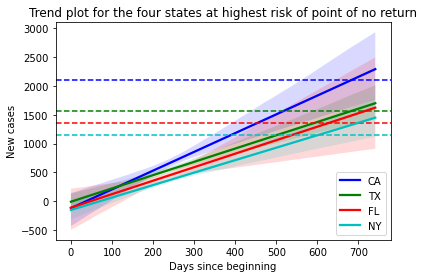

In [33]:
#creating variables for linear regression
x = new_cases_daily_m.index.values
y1 = 0.1 * new_cases_daily_m['CA']
y2 = 0.1 * new_cases_daily_m['TX']
y3 = 0.1 * new_cases_daily_m['FL']
y4 = 0.1 * new_cases_daily_m['NY']

no_ret1 = no_return.loc['CA','difference']
no_ret2 = no_return.loc['TX','difference']
no_ret3 = no_return.loc['FL','difference']
no_ret4 = no_return.loc['NY','difference']

#linear regression trend plot for the state-wise fitted values with their respective confidence intervals
#dotted line shows the point of no return for each state
sns.regplot(x=x, y=y1, order=1, color='b', scatter=False, label='CA')
plt.axhline(y=no_ret1, color='b', linestyle='--')
sns.regplot(x=x, y=y2, order=1, color='g', scatter=False, label='TX')
plt.axhline(y=no_ret2, color='g', linestyle='--')
sns.regplot(x=x, y=y3, order=1, color='r', scatter=False, label='FL')
plt.axhline(y=no_ret3, color='r', linestyle='--')
sns.regplot(x=x, y=y4, order=1, color='c', scatter=False, label='NY')
plt.axhline(y=no_ret4, color='c', linestyle='--')

#setting legend, title and axes labels
plt.legend()
plt.title('Trend plot for the four states at highest risk of point of no return')
plt.xlabel('Days since beginning')
plt.ylabel('New cases')
plt.show()

## Task 3: Perform hypothesis testing.

I will perform hypothesis test based on the political leanings datatset. I will be changing my questions as two of the datasets I chose in stage 2 have few data points. So I will test (a) whether political leaning to Democrat and Republican party has any effect on the COVID-19 cases and (b) whether having a shortage of hospital beds has an effect on COVID-19 deaths. 

#### (a) whether political leaning to Democrat and Republican party has any effect on the COVID-19 cases.

The null hypothesis is that political affiliation has no association with the cases in the state. The alternate hypothesis is that there is an association. 

A decision regarding this is made by taking mean number of cases (per 100,000 persons in the state) as the response variable and the statewise information on presidential election 2020 results as the (categorical) explanatory variable. Linear regression is used to fit the explanatory variable (political leaning) on the response variable (COVID-19 deaths) and the model summary is used to make a decision whether to reject or not to reject null hypothesis.

In [34]:
#add a column indicating which party won 
#(positive difference: Democrat (party_won=1), negative difference: Republican (party_won=0))
pol = pd.read_csv("../../../../data/stage_3/diff_president_votes_states.csv")
pol['party_won'] = pol.diff_president_votes.gt(0).astype(int)
pol.set_index('state',drop=True,inplace=True)
pol

,total_pop,diff_president_votes,party_won
state,,,
DE,973764,95665,1
DC,705749,298737,1
FL,21477737,-371686,0
GA,10617423,11779,1
HI,1415872,169266,1
ID,1787065,-267098,0
IL,12671821,1429227,1
IN,6732219,-487357,0
IA,3155070,-138611,0


In [35]:
#compute state total populations
county_pop = f3_1.drop(columns = ['countyfips'])
pop_states = county_pop.groupby('state').sum()

#convert state total populations to a series
p = pop_states.squeeze()

In [36]:
#compute mean new cases for each state over all the days and then normalize the means by per 100,000 prsons in the state
mean_cases = new_cases_daily_m.T.mean(axis=1)
y = mean_cases.div(p/100000)

In [37]:
df = pd.concat([y, pol['party_won']], axis=1, join='inner')
df.rename(columns = {0: "mean_cases"}, inplace=True)
df

,mean_cases,party_won
AK,39.395078,0
AL,34.096766,0
AR,34.303161,0
AZ,35.243078,1
CA,27.496285,1
CO,29.865091,1
CT,26.590481,1
DC,25.119649,1
DE,34.518429,1
FL,35.204560,0


In [38]:
#linear regression fit
mod = smf.ols(formula = 'mean_cases ~ party_won', data=df).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             mean_cases   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     20.07
Date:                Fri, 08 Apr 2022   Prob (F-statistic):           4.48e-05
Time:                        20:33:22   Log-Likelihood:                -147.43
No. Observations:                  51   AIC:                             298.9
Df Residuals:                      49   BIC:                             302.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.7511      0.889     37.962      0.000      31.964      35.538
party_won     -5.5786      1.245     -4.480      0.000      -8.081      -3.076
==============================================================================
Omnibus:                        0.427   Durbin-Watson:                   1.749
Prob(Omnibus):                  0.808   Jarque-Bera (JB):                0.086
Skew:                           0.084   Prob(JB):                        0.958
Kurtosis:                       3.109   Cond. No.                         2.64
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Interpretations:

* The linear regression coefficient estimate of the winning party is negative (-5.58) with a p-value = 0 which is less than 0.05. Thus it can be said with 95% level of statistical confidence that there is sufficient evidence to reject the null hypothesis. We can conclude that political leaning has an effect on the number of COVID-19 cases across the states in the US.

* Further, since the coefficient estimate is negative, it can be inferred that being affiliated to the Democratic party (party_won=1) reduces the number of new COVID-19 cases (on an average).

#### (b) whether having a shortage in hospital beds has an effect on COVID-19 deaths.

The null hypothesis is that shortage of hospital beds has no association with COVID-19 deaths in a state. The alternate hypothesis is that there is an association. 

A decision regarding this is made by taking mean number of deaths (per 100,000 persons in each state) as the response variable and the statewise information on shortage of hospital beds (yes=1, no=0) as the (categorical) explanatory variable. Linear regression is used to fit the explanatory variable (hospital bed shortage) on the response variable (COVID-19 deaths) and the model summary is used to make a decision whether to reject or not to reject null hypothesis.

In [39]:
# This code has been taken from my Phase 3 member task

#new deaths for states
deaths_states = f2_1.drop(columns = ['countyfips','statefips','2020-01-22','2020-01-23','2020-01-24',
                                                 '2022-02-06','2022-02-07'])
#total deaths by state
deaths_states_total = deaths_states.groupby('state').sum()

#new deaths by state
new_deaths_daily = deaths_states_total.diff(axis=1)

#delete data for 2020-01-25
new_deaths_daily = new_deaths_daily.drop(columns = ['2020-01-25'])

#mean number of new cases by states
mean_deaths = new_deaths_daily.mean(axis=1)

#normalized means per 100000 persons by state populations
mean_deaths = mean_deaths/p*100000
mean_deaths

state
AK    0.193255
AL    0.477466
AR    0.435957
AZ    0.491223
CA    0.273684
CO    0.266559
CT    0.383981
DC    0.246913
DE    0.354724
FL    0.232002
GA    0.407432
HI    0.113461
IA    0.369789
ID    0.337707
IL    0.363787
IN    0.434648
KS    0.356945
KY    0.394056
LA    0.461094
MA    0.437211
MD    0.301099
ME    0.180869
MI    0.440714
MN    0.277183
MO    0.386059
MS    0.509441
MT    0.382203
NC    0.271094
ND    0.376691
NE    0.155365
NH    0.219941
NJ    0.483538
NM    0.420028
NV    0.400092
NY    0.449976
OH    0.394451
OK    0.370529
OR    0.198558
PA    0.435400
RI    0.420332
SC    0.413340
SD    0.405992
TN    0.436924
TX    0.369097
UT    0.159911
VA    0.263731
VT    0.117495
WA    0.194009
WI    0.293178
WV    0.439624
WY    0.384222
dtype: float64

In [40]:
df = pd.concat([mean_deaths, no_return['shortage']], axis=1, join='inner')
df.rename(columns = {0: "mean_deaths"}, inplace=True)
df

,mean_deaths,shortage
state,,
AK,0.193255,0
AL,0.477466,1
AR,0.435957,1
AZ,0.491223,1
CA,0.273684,1
CO,0.266559,1
CT,0.383981,0
DC,0.246913,0
DE,0.354724,0


In [41]:
#linear regression fit
mod = smf.ols(formula = 'mean_deaths ~ shortage', data=df).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            mean_deaths   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     7.136
Date:                Fri, 08 Apr 2022   Prob (F-statistic):             0.0102
Time:                        20:33:22   Log-Likelihood:                 46.577
No. Observations:                  51   AIC:                            -89.15
Df Residuals:                      49   BIC:                            -85.29
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2741      0.030      9.179      0.000       0.214       0.334
shortage       0.0901      0.034      2.671      0.010       0.022       0.158
==============================================================================
Omnibus:                        4.811   Durbin-Watson:                   1.630
Prob(Omnibus):                  0.090   Jarque-Bera (JB):                3.393
Skew:                          -0.479   Prob(JB):                        0.183
Kurtosis:                       2.175   Cond. No.                         4.09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Interpretations:

* The linear regression coefficient estimate of the winning party is positive (0.0901) with a p-value = 0.010 which is less than 0.05. Thus it can be said with 95% level of statistical confidence that there is sufficient evidence to reject the null hypothesis. We can conclude that shortage of hospital beds has a significant effect on the number of COVID-19 deaths across the states in the US.

* Further, since the coefficient estimate is positive, it can be inferred that having shortage of hospital beds (shortage=1) increases the number of COVID-19 deaths pr 100,000 persons (on an average).